<a href="https://colab.research.google.com/github/juniorfutang/qpm_data/blob/Thomas/chemE_thomas_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import skimage.data as data
import skimage.segmentation as seg
from skimage.filters import threshold_otsu
import skimage.draw as draw
import skimage.color as color

In [2]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


Seeing how segmentation work, if all work, we can actually use it as a function to segment all images. Loading the very first image

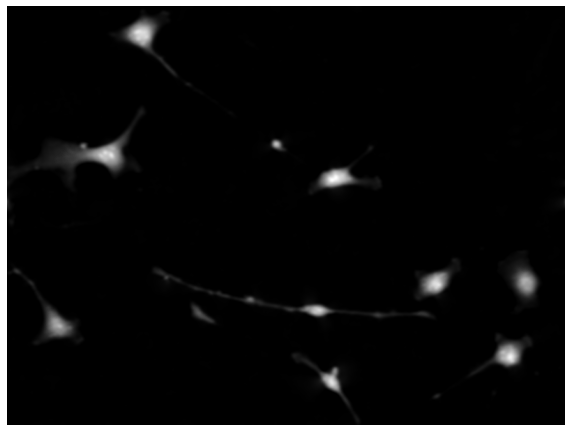

In [19]:
myim = plt.imread('drive/MyDrive/bgremovedphase/bgremovedphase/phase0.tif')
image_gray = color.rgb2gray(myim)
fig, ax = plt.subplots(figsize=(10,10));
ax.imshow(myim, cmap='gray');
ax.axis('off');

Looking at the historgram of our pixels

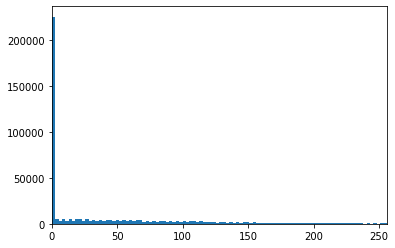

In [22]:
fig, ax = plt.subplots(1, 1)
ax.hist(myim.ravel(), bins=100, range=[0, 256])
ax.set_xlim(0, 256); # we can identify different numbers to try supervised thresholding

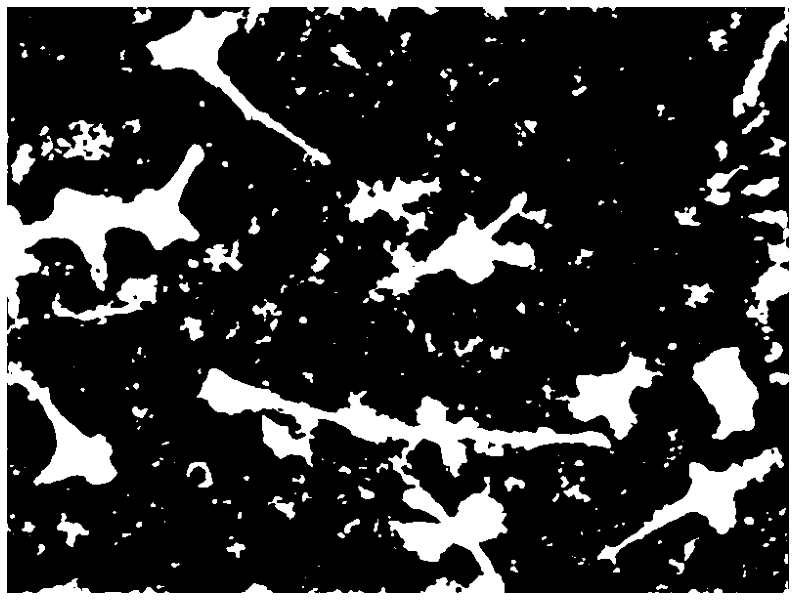

In [23]:
def image_show(image, nrows=1, ncols=1, cmap='gray'):
    fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(14, 14))
    ax.imshow(image, cmap='gray')
    ax.axis('off')
    return fig, ax

myim_segmented = myim > 150
image_show(myim_segmented);

Looks like it is picking up even the slightest white-like pixel. This is not ideal. We should try something different. Let's try one of skimage's thresholding modules

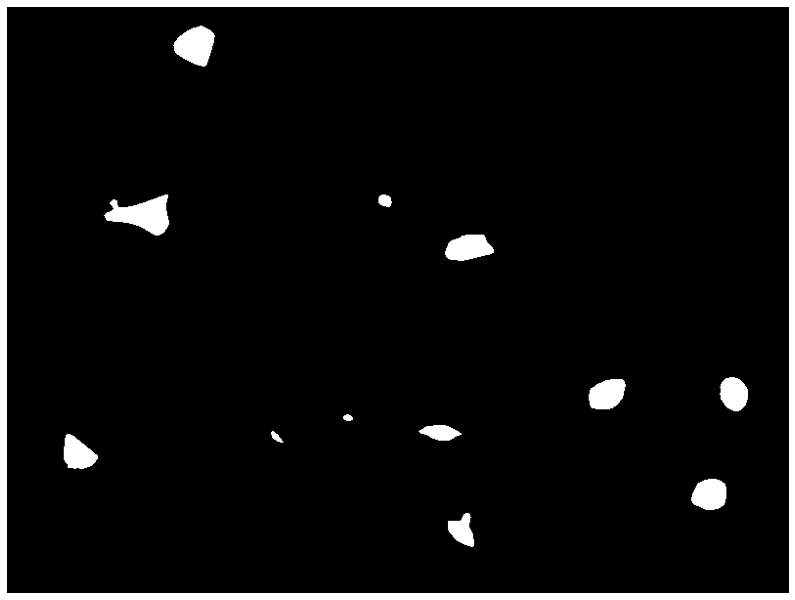

In [33]:
myim_threshold = threshold_otsu(myim)
image_show(myim > myim_threshold);

Alot better! Still some more way to go

Making another plot function that will show axis too, so it is easier to apply following functions

In [38]:
def plot_image(image, nrows=1, ncols=1, cmap='gray'):
    fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(7, 7))
    ax.imshow(image, cmap='gray')
    return fig, ax

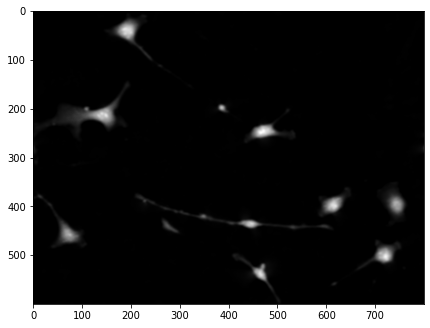

In [42]:
plot_image(myim);

In [45]:
def circle_points(resolution, center, radius):

  # Generate points which define a circle on an image. Center refers to the center of the circle

  radians = np.linspace(0, 2*np.pi, resolution)
  c = center[1] + radius*np.cos(radians) #polar co-ordinates
  r = center[0] + radius*np.sin(radians)
    
  return np.array([c, r]).T
  # Exclude last point because a closed path should not have duplicate points

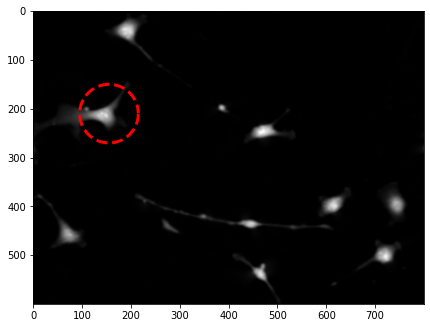

In [57]:
fig, ax = plot_image(image)
points = circle_points(300, [210, 155], 60)[:-1]
ax.plot(points[:, 0], points[:, 1], '--r', lw=3)

Have to work around chaning radius of the circle and resolution to find a optial value. I do not believe this is ideal because we can't individually change radius, resolution, and coordinates for all possible cells :(

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The coordinates used by `active_contour` will change from xy coordinates (transposed from image dimensions) to rc coordinates in scikit-image 0.18. Set `coordinates='rc'` to silence this warning. `coordinates='xy'` will restore the old behavior until 0.18, but will stop working thereafter.
  """Entry point for launching an IPython kernel.


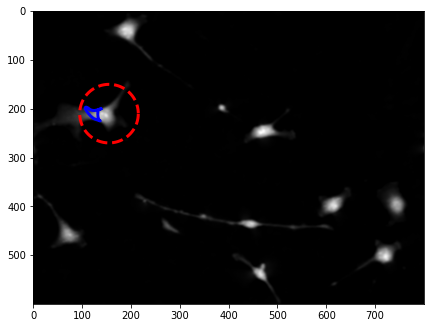

In [58]:
snake = seg.active_contour(image_gray, points);
fig, ax = plot_image(image);
ax.plot(points[:, 0], points[:, 1], '--r', lw=3);
ax.plot(snake[:, 0], snake[:, 1], '-b', lw=3);

U see the result is not showing very well.

In [59]:
from ipywidgets import interact
import ipywidgets as widgets

Let's now try to move on to tracking. Detailed instructions and helpful codes are in here : https://www.pyimagesearch.com/2018/07/23/simple-object-tracking-with-opencv/

First, we have to make sure all images are uploaded and visible through the notebook.

In [ ]:
drive.mount('/content/MyDrive/')

In [ ]:
im = np.zeros((600,800,288)) #288 slides

for i in range(288):
  img = plt.imread('/content/MyDrive/MyDrive/bgremovedphase/bgremovedphase/phase{}.tif'.format(i))
  im[:,:,i] = img
  height, width = img.shape
  size = (width,height)

In [ ]:
def current_frame(i=0):

  fig, ax = plt.subplots(figsize=(8,8))

  ax.imshow(im[:,:,i], cmap='gray')
  ax.axis('off')

In [ ]:
interact(current_frame, i=widgets.IntSlider(value=0, min=0, max=287, step=1))

Now, let's see if we can put them into a video slide

In [ ]:
out = cv2.VideoWriter('project.avi',cv2.VideoWriter_fourcc(*'DIVX'), 15, size)

In [ ]:
for i in range(288):
  out.write(im[i])
out.release()

I am getting OpenCV(4.1.2) /io/opencv/modules/videoio/src/cap_ffmpeg.cpp:144: error: (-215:Assertion failed) image.depth() == CV_8U in function 'write' Error.